# Data Analysis on Iris Dataset

Data Analysis on **`iris`** dataset from R's built-in datasets. It is a classic dataset containing 150 observations of iris flowers, with four features describing their measurements, along with the species they belong to.

**Note: Make sure you select language R before you run this notebook**

In [1]:
# imports
library(tidyverse)
#supress warnings
knitr::opts_chunk$set(warning = FALSE)
# Ed's favorite options
knitr::opts_chunk$set(echo=TRUE, cache=TRUE, fig.asp=0.65, fig.width=6.5, comment="")
# scipen makes scientific notation less likely
# pillar.sigfig controls number of significant digits in tibble output
options(tibble.print_max=6, tibble.print_min=6, scipen=9, pillar.sigfig=4)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## 1. About the Dataset:

The `iris` dataset consists of 150 samples from each of three species of Iris flowers (setosa, versicolor, and virginica). Four features were measured for each sample: the lengths and widths of the sepals and petals.


In [2]:
# Load the iris dataset
data(iris)

# Take a look at the data
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


## 2. Scatter Plot - Finding Patterns:

We can use scatter plots to observe relationships between variables, such as how petal length and width vary across species.

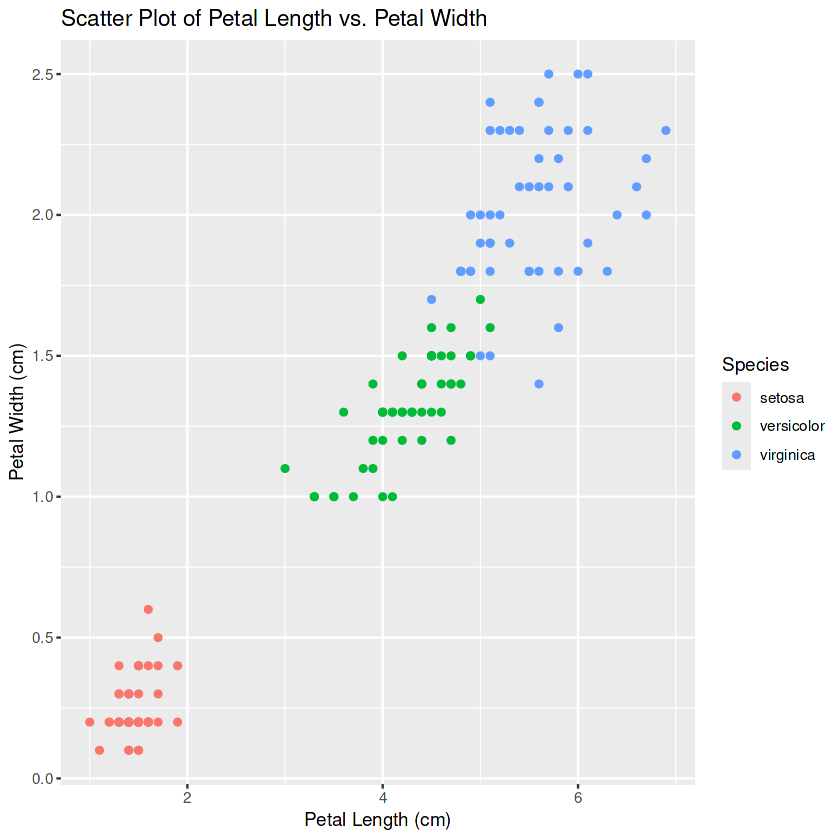

In [3]:
library(ggplot2)
ggplot(iris, aes(x = Petal.Length, y = Petal.Width, color = Species)) +
  geom_point() +
  labs(title = "Scatter Plot of Petal Length vs. Petal Width", 
       x = "Petal Length (cm)", 
       y = "Petal Width (cm)")

**Observation**: The scatter plot reveals that there is a clear separation between species based on petal dimensions. Setosa flowers form a distinct group, while versicolor and virginica have some overlap. For machine learning models petal length can be important to predict which flower it is given petal length.


## 3. Histogram and Count Plot:

Histograms are useful to understand the distribution of individual features.

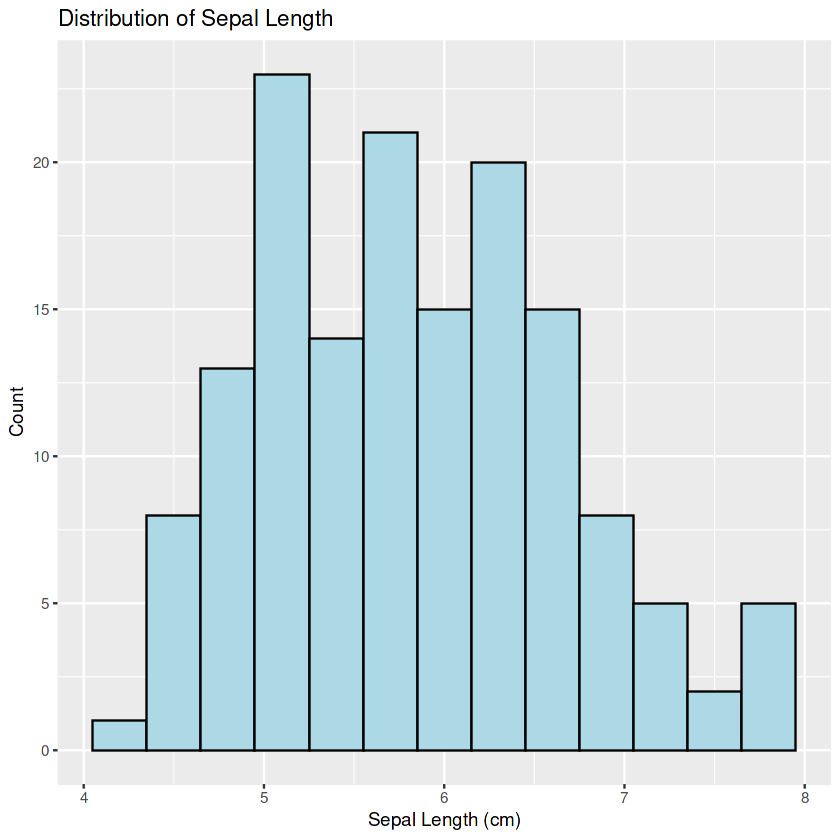

In [4]:
ggplot(iris, aes(x = Sepal.Length)) +
  geom_histogram(binwidth = 0.3, fill = "lightblue", color = "black") +
  labs(title = "Distribution of Sepal Length", x = "Sepal Length (cm)", y = "Count")

**Observation**: The histogram shows that the majority of the Sepal Lengths fall between 5 and 6 cm, with a few extreme values at both ends.


## 4. Box Plot - Finding Outliers:

A box plot allows us to see the spread of values and detect any potential outliers.

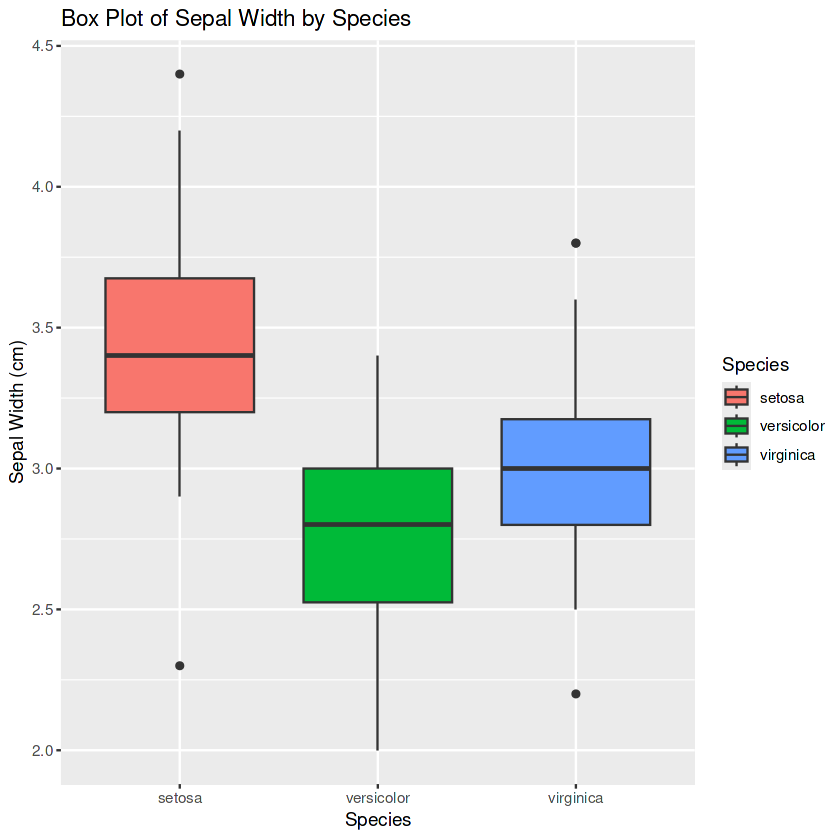

In [5]:
ggplot(iris, aes(x = Species, y = Sepal.Width, fill = Species)) +
  geom_boxplot() +
  labs(title = "Box Plot of Sepal Width by Species", x = "Species", y = "Sepal Width (cm)")

**Observation**: The box plot shows that the Setosa species generally has higher Sepal Width values compared to Versicolor and Virginica. Virginica has the widest range of Sepal Widths.

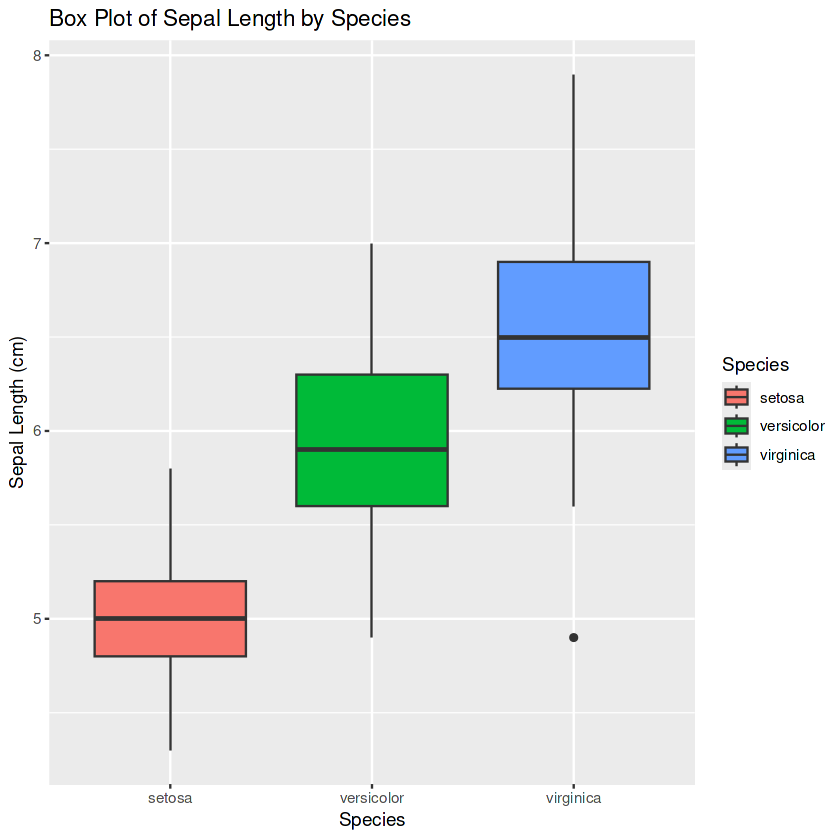

In [6]:
ggplot(iris, aes(x = Species, y = Sepal.Length, fill = Species)) +
  geom_boxplot() +
  labs(title = "Box Plot of Sepal Length by Species", x = "Species", y = "Sepal Length (cm)")

**Observation:** From the box plot we can see that Setosa’s Sepal Lengths are generally shorter compared to Versicolor and Virginica. Virginica has the highest median Sepal Length, but there are a few outliers for Versicolor.

## 5. Correlation Analysis:

Let’s also look at the correlation between features using a heatmap.

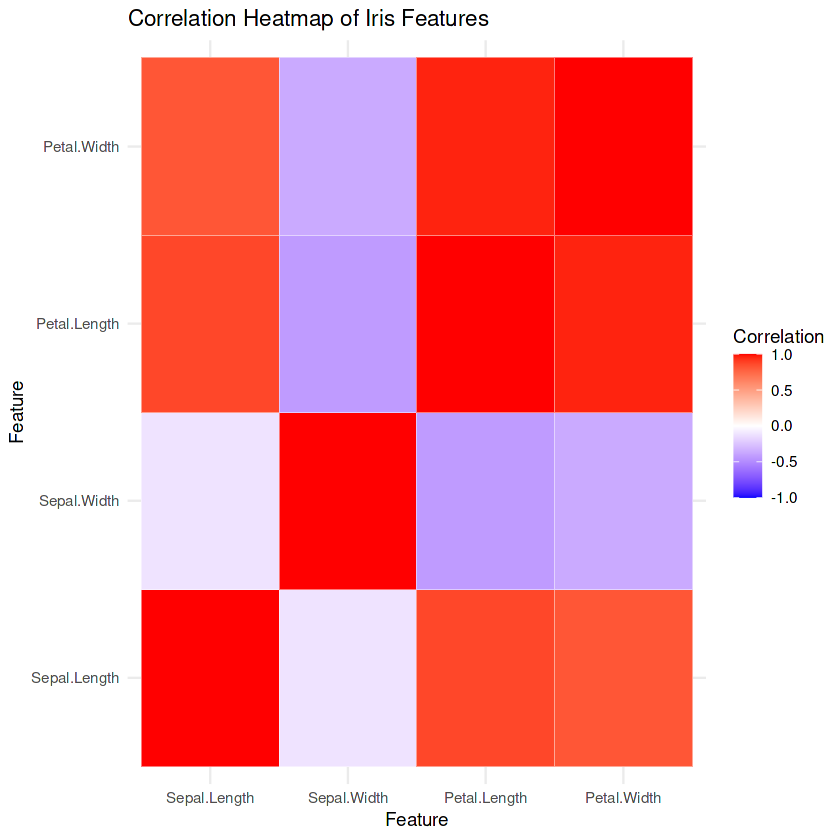

In [7]:
# Calculate the correlation matrix
cor_matrix <- cor(iris[, 1:4])

# Melt the correlation matrix for heatmap
cor_data <- as.data.frame(as.table(cor_matrix))

# Plot the heatmap
ggplot(cor_data, aes(Var1, Var2, fill = Freq)) + 
  geom_tile(color = "white") +
  scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
                       midpoint = 0, limit = c(-1, 1), space = "Lab", 
                       name="Correlation") +
  labs(title = "Correlation Heatmap of Iris Features", x = "Feature", y = "Feature") +
  theme_minimal()

**Observation**: Petal Length and Petal Width have a strong positive correlation, while Sepal Length and Sepal Width are weakly correlated.


## 6. Density Plot - Distribution Across Features:

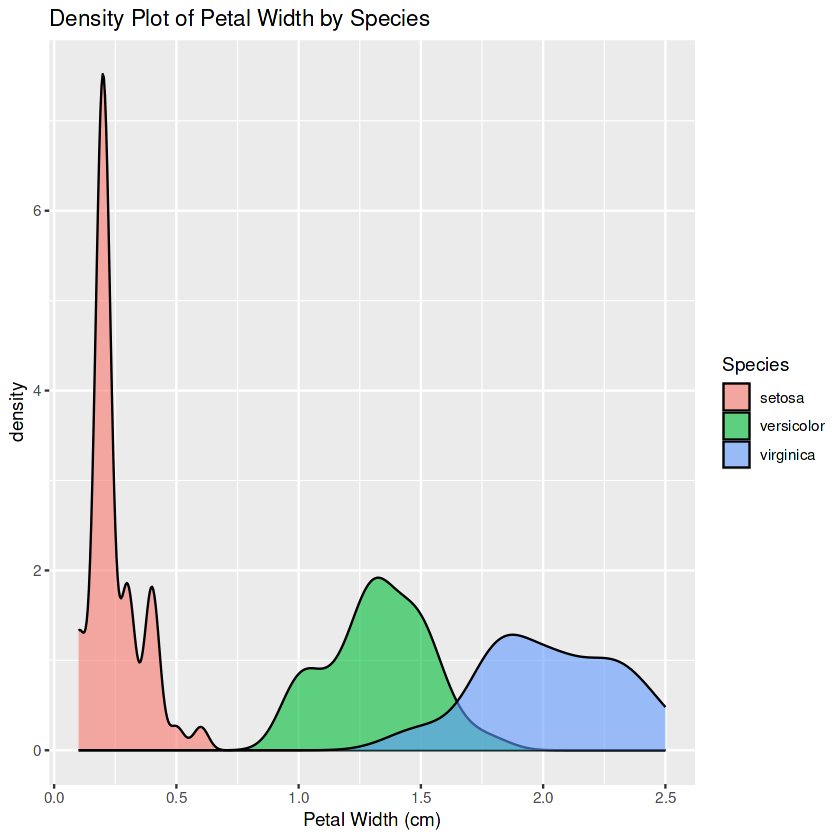

In [8]:
# Density plot of Petal.Width by Species
ggplot(iris, aes(x=Petal.Width, fill=Species)) +
  geom_density(alpha=0.6) +
  labs(title="Density Plot of Petal Width by Species", x="Petal Width (cm)")

**Observation:** This plot highlights the differences in petal width distribution. Setosa has a very distinct range (low Petal Width), while Virginica has a wider spread, and Versicolor occupies the middle ground.

## 7. Pair Plot - Multivariate Relationships:


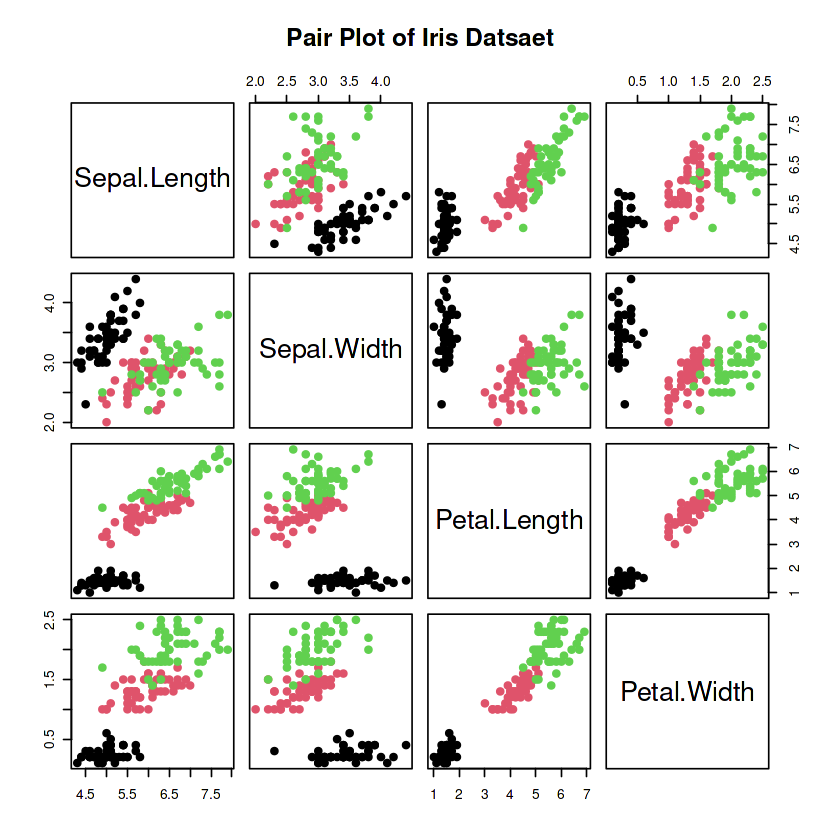

In [9]:
# Pair plot to examine pairwise relationships
pairs(iris[, 1:4], col=iris$Species, pch=19, main="Pair Plot of Iris Datsaet")

**Observations:** The pair plot provides a deeper look into the relationships between each pair of features. The distinct clustering of Setosa can be seen across all feature pairs, while Versicolor and Virginica overlap in most feature pairs.

## 8. Violin Plot - Comparing Distributions:

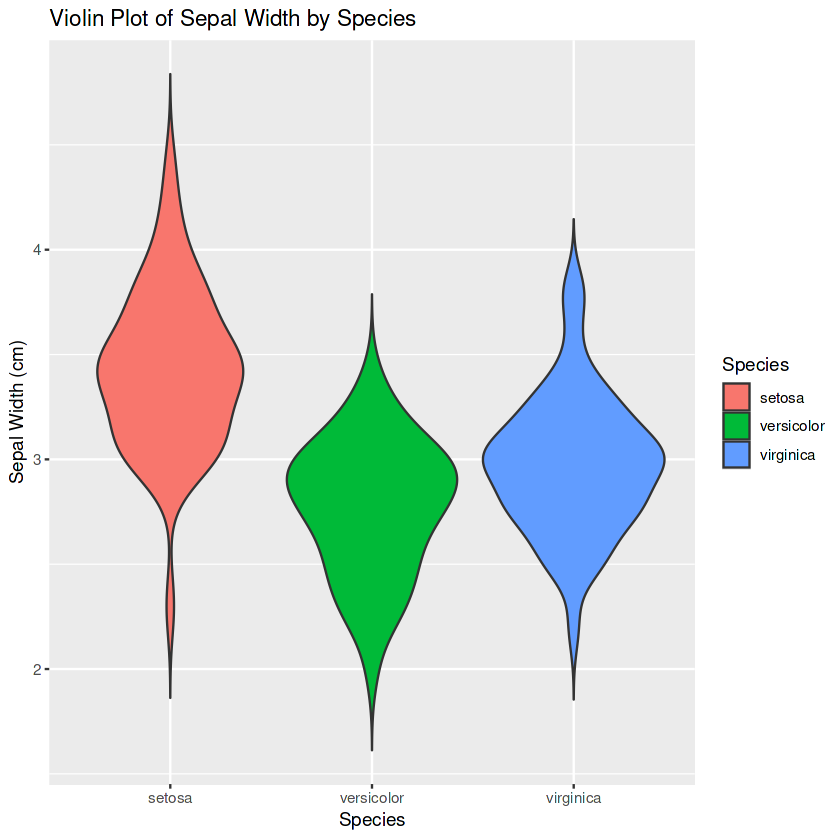

In [10]:
# Violin plot of Sepal.Width by Species
ggplot(iris, aes(x = Species, y = Sepal.Width, fill = Species)) +
  geom_violin(trim = FALSE) +
  labs(title = "Violin Plot of Sepal Width by Species", x = "Species", y = "Sepal Width (cm)")

**Observation:** The violin plot shows the distribution of Sepal Width for each species. Setosa has a much more uniform distribution with higher Sepal Width values, while Virginica and Versicolor display more variability.

#### As I data Scientist we have to write the story what we found over the data and present some one. The below sample show a simple story about the observation what we found in the dataset.

------------------------------------------------------------------------

## Story: Uncovering Patterns in the Iris Dataset

### **Introduction**:

The `iris` dataset is a small but famous dataset often used to demonstrate data analysis techniques. It contains measurements of 150 iris flowers from three species: Setosa, Versicolor, and Virginica. These flowers were measured for the length and width of both their sepals and petals. Our goal is to explore these measurements, understand the differences between the species, and see if we can identify patterns that separate them.

### **Observations**:

1.  **Scatter Plot**: When we plot Sepal Length against Sepal Width, a clear pattern emerges. Setosa flowers stand out with shorter, wider sepals compared to the other species. Virginica, on the other hand, tends to have longer sepals, while Versicolor sits between the two, with some overlap with Virginica.

2.  **Histogram**: Looking at the Petal Length of each species, we see that Setosa has much shorter petals than the other species, making it easy to identify. Versicolor and Virginica have longer petals, but Virginica's petals are the longest on average.

3.  **Box Plot**: The box plot for Sepal Length gives us more insight. Setosa consistently has shorter sepals, while Virginica has the longest. Versicolor again falls between the two, with a few exceptions.

4.  **Density Plot**: The density plot for Petal Width shows a clear separation between species. Setosa's petals are consistently narrow, while Virginica's petal widths are more spread out, with Versicolor somewhere in the middle.

5.  **Correlation Heatmap**: By looking at how the features relate to each other, we see that Petal Length and Petal Width are strongly linked. In other words, flowers with long petals also tend to have wide petals, which helps in identifying their species. The relationship between Sepal Length and Sepal Width is weaker.

6.  **Pair Plot**: When we look at all the feature pairs together, it becomes clear that Setosa is the easiest species to identify, as it forms a distinct group in almost every comparison. Versicolor and Virginica overlap more, but we can still find differences when we look at the full picture.

7.  **Violin Plot**: The violin plot of Sepal Width shows us how the width varies within each species. Setosa is more consistent in its Sepal Width, while the other two species show more variation.

### **Summary**:

Through our exploration of the `iris` dataset, we've learned that Setosa is very easy to distinguish from the other species based on its smaller, wider sepals and narrower petals. Versicolor and Virginica are harder to tell apart, but by considering multiple features—especially the petals—we can begin to separate them. These insights came from a range of visual tools, like scatter plots, histograms, and box plots, all of which helped us see the relationships between the different flower measurements and their species.


#### Follow for more. If you find this helpful, please like 👍 , comment ✍ , or repost ♻️ . Happy Learning!